In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cs-training.csv")

In [3]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data.shape

(150000, 12)

In [5]:
data.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [6]:
data.columns = data.columns.str.replace("-","")

In [7]:
## All columns are numerical
## Segregrating Dependent and Independent Variables
Dependent = "SeriousDlqin2yrs"
Independent  = data.columns[2:len(data.columns)]

In [8]:
## Getting the distribution of Independent Variables
data[Independent].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


###### Getting the distribution of Independent Variables
###### Max value(108) of age seems an outlier
###### Min value(0) of age seems an outlier
###### Max value of RevolvingUtilizationOfUnsecuredLines cannot be greater than 1

In [9]:
##Capping the age between 18-60
data.age = np.where(data.age<18,18,data.age)
data.age = np.where(data.age>60,60,data.age)
##Capping the utilzation ratio between 0 and 1
data.RevolvingUtilizationOfUnsecuredLines = np.where(data.RevolvingUtilizationOfUnsecuredLines>1,1,data.RevolvingUtilizationOfUnsecuredLines)

In [10]:
## Keeping a copy of data
data_arc = data.copy()

In [11]:
data = data_arc.copy()

In [12]:
## Replacing the NAs
mean = np.nanmean(data.MonthlyIncome)
data.MonthlyIncome = np.where(data.MonthlyIncome.isna(),mean,data.MonthlyIncome)
import statistics
mode = statistics.mode(data.NumberOfDependents)
data.NumberOfDependents = np.where(data.NumberOfDependents.isna(),mode,data.NumberOfDependents)

In [13]:
## Calculating number of NAs
data.isna().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime3059DaysPastDueNotWorse     0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime6089DaysPastDueNotWorse     0
NumberOfDependents                      0
dtype: int64

In [14]:
## Binning of data
data_bin = pd.DataFrame()
data_bin['age'] = pd.qcut(data.age,q=4,duplicates='drop')
data_bin['SeriousDlqin2yrs'] = data.SeriousDlqin2yrs
data_bin['RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(data.RevolvingUtilizationOfUnsecuredLines,q=4,duplicates='drop')
data_bin['NumberOfTime3059DaysPastDueNotWorse'] = data.NumberOfTime3059DaysPastDueNotWorse
data_bin['DebtRatio'] = pd.qcut(data.DebtRatio,q=4,duplicates='drop')
data_bin['MonthlyIncome'] = pd.qcut(data.MonthlyIncome,q=4,duplicates='drop')
data_bin['NumberOfOpenCreditLinesAndLoans'] = pd.qcut(data.NumberOfOpenCreditLinesAndLoans,q=4,duplicates='drop')
data_bin['NumberOfTimes90DaysLate'] = data.NumberOfTimes90DaysLate
data_bin['NumberRealEstateLoansOrLines'] = pd.qcut(data.NumberRealEstateLoansOrLines,q=4,duplicates='drop')
data_bin['NumberOfTime6089DaysPastDueNotWorse'] = data.NumberOfTime6089DaysPastDueNotWorse
data_bin['NumberOfDependents'] = pd.qcut(data.NumberOfDependents,q=4,duplicates='drop')

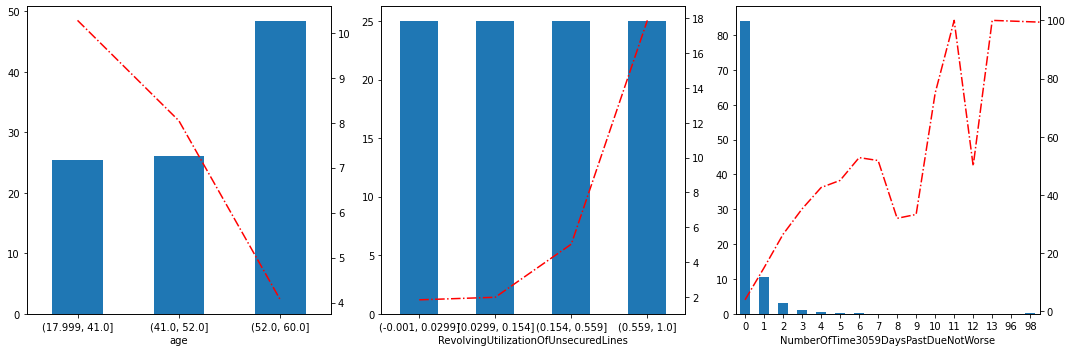

In [15]:
fig, axs = plt.subplots(1,3,figsize=(15, 5))
#calculating bad rate
Freq = pd.crosstab(data_bin.age,data_bin.SeriousDlqin2yrs)
Freq = pd.DataFrame({'Pop': (Freq[0]+Freq[1])/data.shape[0]*100, 'Bad_Rate': Freq[1]/(Freq[0]+Freq[1])*100})
#Plotting Bad Rate and Population%
Freq.Pop.plot(kind = 'bar',ax=axs[0])
Freq.Bad_Rate.plot(kind = 'line',color = 'red',secondary_y=True,linestyle='-.',ax=axs[0])
### Higher the age Lower the bad rate


#calculating bad rate
Freq = pd.crosstab(data_bin.RevolvingUtilizationOfUnsecuredLines,data_bin.SeriousDlqin2yrs)
Freq = pd.DataFrame({'Pop': (Freq[0]+Freq[1])/data.shape[0]*100, 'Bad_Rate': Freq[1]/(Freq[0]+Freq[1])*100})
#Plotting Bad Rate and Population%
Freq.Pop.plot(kind = 'bar',ax=axs[1])
Freq.Bad_Rate.plot(kind = 'line',color = 'red',secondary_y=True,linestyle='-.',ax=axs[1])
### Higher Utilization Implies High Bad Rate


#calculating bad rate
Freq = pd.crosstab(data_bin.NumberOfTime3059DaysPastDueNotWorse,data_bin.SeriousDlqin2yrs)
Freq = pd.DataFrame({'Pop': (Freq[0]+Freq[1])/data.shape[0]*100, 'Bad_Rate': Freq[1]/(Freq[0]+Freq[1])*100})
#Plotting Bad Rate and Population%
Freq.Pop.plot(kind = 'bar',ax=axs[2])
Freq.Bad_Rate.plot(kind = 'line',color = 'red',secondary_y=True,linestyle='-.',ax=axs[2])
fig.tight_layout()
### High Number of 30+ delinquency results in higher bad rate


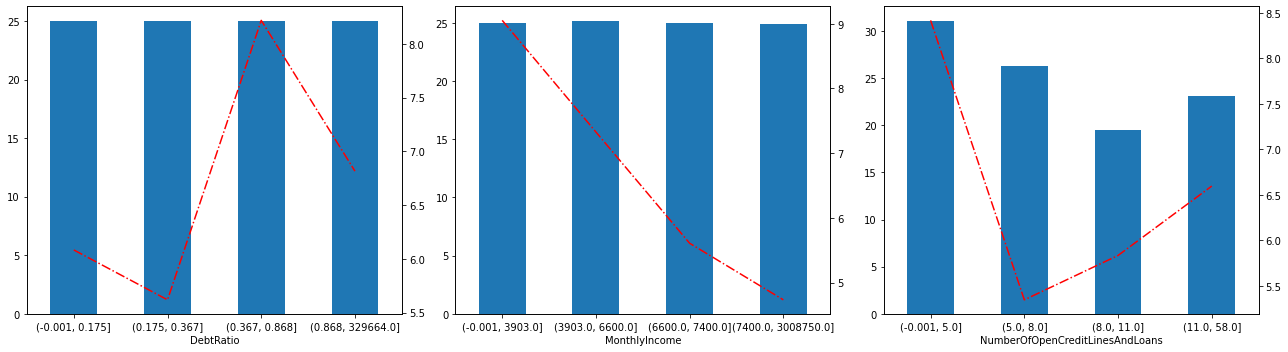

In [16]:
fig, axs = plt.subplots(1,3,figsize=(18, 5))
#calculating bad rate
Freq = pd.crosstab(data_bin.DebtRatio,data_bin.SeriousDlqin2yrs)
Freq = pd.DataFrame({'Pop': (Freq[0]+Freq[1])/data.shape[0]*100, 'Bad_Rate': Freq[1]/(Freq[0]+Freq[1])*100})
#Plotting Bad Rate and Population%
Freq.Pop.plot(kind = 'bar',ax=axs[0])
Freq.Bad_Rate.plot(kind = 'line',color = 'red',secondary_y=True,linestyle='-.',ax=axs[0])
### It looks like a 'U' shape bad rate distribution low and high debt fetch high bad rate


#calculating bad rate
Freq = pd.crosstab(data_bin.MonthlyIncome,data_bin.SeriousDlqin2yrs)
Freq = pd.DataFrame({'Pop': (Freq[0]+Freq[1])/data.shape[0]*100, 'Bad_Rate': Freq[1]/(Freq[0]+Freq[1])*100})
#Plotting Bad Rate and Population%
Freq.Pop.plot(kind = 'bar',ax=axs[1])
Freq.Bad_Rate.plot(kind = 'line',color = 'red',secondary_y=True,linestyle='-.',ax=axs[1])
### Higher monthly Income implies lower bad rate


#calculating bad rate
Freq = pd.crosstab(data_bin.NumberOfOpenCreditLinesAndLoans,data_bin.SeriousDlqin2yrs)
Freq = pd.DataFrame({'Pop': (Freq[0]+Freq[1])/data.shape[0]*100, 'Bad_Rate': Freq[1]/(Freq[0]+Freq[1])*100})
#Plotting Bad Rate and Population%
Freq.Pop.plot(kind = 'bar',ax=axs[2])
Freq.Bad_Rate.plot(kind = 'line',color = 'red',secondary_y=True,linestyle='-.',ax=axs[2])
fig.tight_layout()
### 'U' shape bad distribution with low and high number of credit lines fetch high bad rate

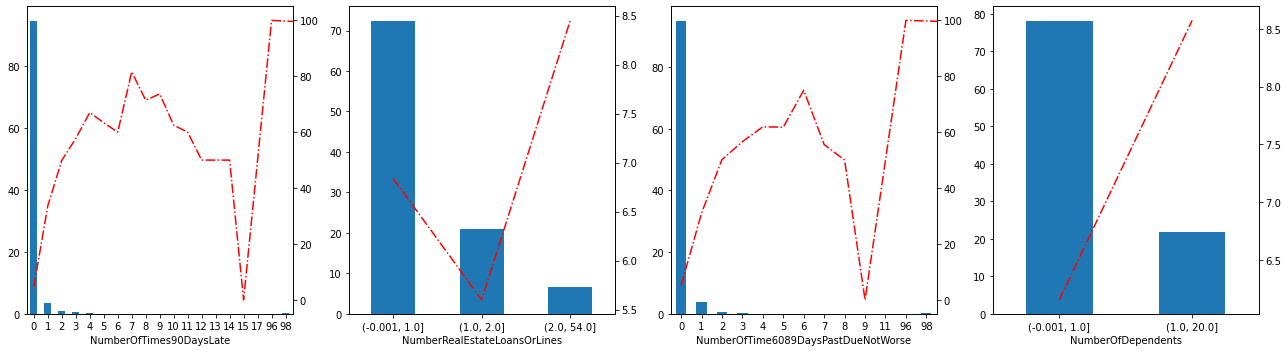

In [17]:
fig, axs = plt.subplots(1,4,figsize=(18, 5))
#calculating bad rate
Freq = pd.crosstab(data_bin.NumberOfTimes90DaysLate,data_bin.SeriousDlqin2yrs)
Freq = pd.DataFrame({'Pop': (Freq[0]+Freq[1])/data.shape[0]*100, 'Bad_Rate': Freq[1]/(Freq[0]+Freq[1])*100})
#Plotting Bad Rate and Population%
Freq.Pop.plot(kind = 'bar',ax=axs[0])
Freq.Bad_Rate.plot(kind = 'line',color = 'red',secondary_y=True,linestyle='-.',ax=axs[0])
### High number of 90+ delinquency results in high bad rate


#calculating bad rate
Freq = pd.crosstab(data_bin.NumberRealEstateLoansOrLines,data_bin.SeriousDlqin2yrs)
Freq = pd.DataFrame({'Pop': (Freq[0]+Freq[1])/data.shape[0]*100, 'Bad_Rate': Freq[1]/(Freq[0]+Freq[1])*100})
#Plotting Bad Rate and Population%
Freq.Pop.plot(kind = 'bar',ax=axs[1])
Freq.Bad_Rate.plot(kind = 'line',color = 'red',secondary_y=True,linestyle='-.',ax=axs[1])
### 'U' shape bad rate distribution with low and high number of real estate loans fetching higher bad rate


#calculating bad rate
Freq = pd.crosstab(data_bin.NumberOfTime6089DaysPastDueNotWorse,data_bin.SeriousDlqin2yrs)
Freq = pd.DataFrame({'Pop': (Freq[0]+Freq[1])/data.shape[0]*100, 'Bad_Rate': Freq[1]/(Freq[0]+Freq[1])*100})
#Plotting Bad Rate and Population%
Freq.Pop.plot(kind = 'bar',ax=axs[2])
Freq.Bad_Rate.plot(kind = 'line',color = 'red',secondary_y=True,linestyle='-.',ax=axs[2])
### High number of 60+ delinquency results in high bad rate


#calculating bad rate
Freq = pd.crosstab(data_bin.NumberOfDependents,data_bin.SeriousDlqin2yrs)
Freq = pd.DataFrame({'Pop': (Freq[0]+Freq[1])/data.shape[0]*100, 'Bad_Rate': Freq[1]/(Freq[0]+Freq[1])*100})
#Plotting Bad Rate and Population%
Freq.Pop.plot(kind = 'bar',ax=axs[3])
Freq.Bad_Rate.plot(kind = 'line',color = 'red',secondary_y=True,linestyle='-.',ax=axs[3])
fig.tight_layout()
### Higher the number of dependents higher the bad rate

In [18]:
## Calculating the Information Value
# import packages
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)


final_iv, IV = data_vars(data[Independent],data.SeriousDlqin2yrs)
IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
8,RevolvingUtilizationOfUnsecuredLines,1.016361
6,NumberOfTimes90DaysLate,0.484202
4,NumberOfTime3059DaysPastDueNotWorse,0.471831
5,NumberOfTime6089DaysPastDueNotWorse,0.264824
9,age,0.219843
1,MonthlyIncome,0.072611
2,NumberOfDependents,0.023730
0,DebtRatio,0.012360
3,NumberOfOpenCreditLinesAndLoans,0.003695
7,NumberRealEstateLoansOrLines,0.001605


###### Utilization seems to very high IV to be considered as an Input Variable to the model
###### Number of real estate loans and Open Credit lines have IVs less than 1% to be considered

In [19]:
model_vars = ['NumberOfTimes90DaysLate',
              'NumberOfTime3059DaysPastDueNotWorse',
              'NumberOfTime6089DaysPastDueNotWorse',
              'age',
              'MonthlyIncome',
              'NumberOfDependents',
              'DebtRatio']

In [20]:
## Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(data[model_vars])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,variables,VIF
0,NumberOfTimes90DaysLate,72.646337
1,NumberOfTime3059DaysPastDueNotWorse,40.609818
2,NumberOfTime6089DaysPastDueNotWorse,91.286256
3,age,1.668929
4,MonthlyIncome,1.276287
5,NumberOfDependents,1.375460
6,DebtRatio,1.033424


In [21]:
final_vars = ['NumberOfTime3059DaysPastDueNotWorse',
              'age',
              'MonthlyIncome',
              'NumberOfDependents',
              'DebtRatio']
calc_vif(data[final_vars])

,variables,VIF
0,NumberOfTime3059DaysPastDueNotWorse,1.007093
1,age,1.627025
2,MonthlyIncome,1.276189
3,NumberOfDependents,1.369462
4,DebtRatio,1.033279


#### Number of Times 30+, Number of times 60+ and Number of Times 90 days late are highly correlated
###### Number of Times 30+ is kept and 60+ and 90 days are dropped to reduce model dependency on one variable

In [22]:
## Dividing the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[Independent], data[Dependent], test_size=0.3, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(random_state=1,n_estimators=400,max_depth=7,max_features='auto')
## Fitting the model
Random_Forest_model = Classifier.fit(X_train,y_train)

In [24]:
## KS Table
def KS_Table(data,target,probs):
  data["Decile"] = pd.qcut(data[probs],q=10,duplicates='drop')
  data_freq = pd.crosstab(data.Decile,data[target])
  bad = data_freq[1]
  good = data_freq[0]
  bad_rate = data_freq[1]/(data_freq[0]+data_freq[1])*100
  bad_perc = data_freq[1]/data_freq[1].sum()*100
  good_perc = data_freq[0]/data_freq[0].sum()*100
  cum_bad_perc = pd.Series(bad_perc).cumsum()
  cum_good_perc = pd.Series(good_perc).cumsum()
  ks = round(abs(cum_bad_perc-cum_good_perc),2)
  KS_Data = pd.concat([bad,good,bad_rate,bad_perc,good_perc,cum_bad_perc,cum_good_perc,ks],axis=1)
  KS_Data.columns = ['Bad','Good','Bad_Rate','Bad_Percent','Good_Percent','Cum_Bad_Percent','Cum_Good_Percent','KS']
  KS_Data.index = [1,2,3,4,5,6,7,8,9,10]
  return(KS_Data)

In [25]:
##Prediction using random forest model on training dataset
predicted_probs = pd.DataFrame(Random_Forest_model.predict_proba(X_train))
predicted_probs.columns = ['Prob_0','Prob_1']
train_pred = pd.concat([X_train.reset_index(drop = True),predicted_probs.reset_index(drop=True),y_train.reset_index(drop=True)],axis=1)
train_ks_table = KS_Table(data = train_pred,target='SeriousDlqin2yrs',probs = 'Prob_0')
train_ks_table

,Bad,Good,Bad_Rate,Bad_Percent,Good_Percent,Cum_Bad_Percent,Cum_Good_Percent,KS
1,3937,6563,37.495238,55.875674,6.700084,55.875674,6.700084,49.18
2,1238,9262,11.790476,17.570253,9.455459,73.445927,16.155542,57.29
3,688,9812,6.552381,9.764405,10.016947,83.210332,26.172489,57.04
4,413,10087,3.933333,5.861482,10.297691,89.071814,36.470180,52.60
5,302,10198,2.876190,4.286120,10.411009,93.357934,46.881189,46.48
6,162,10338,1.542857,2.299177,10.553933,95.657110,57.435123,38.22
7,107,10393,1.019048,1.518592,10.610082,97.175703,68.045205,29.13
8,107,10393,1.019048,1.518592,10.610082,98.694295,78.655287,20.04
9,63,10437,0.600000,0.894124,10.655001,99.588419,89.310289,10.28
10,29,10471,0.276190,0.411581,10.689711,100.000000,100.000000,0.00


In [26]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train, predicted_probs.Prob_1, pos_label=1)
metrics.auc(fpr, tpr)

0.8699601286256634

In [27]:
##Prediction using random forest model on test dataset
predicted_probs = pd.DataFrame(Random_Forest_model.predict_proba(X_test))
predicted_probs.columns = ['Prob_0','Prob_1']
test_pred = pd.concat([X_test.reset_index(drop = True),predicted_probs.reset_index(drop=True),y_test.reset_index(drop=True)],axis=1)
test_ks_table = KS_Table(data = test_pred,target='SeriousDlqin2yrs',probs = 'Prob_0')
test_ks_table

,Bad,Good,Bad_Rate,Bad_Percent,Good_Percent,Cum_Bad_Percent,Cum_Good_Percent,KS
1,1632,2868,36.266667,54.765101,6.825321,54.765101,6.825321,47.94
2,532,3968,11.822222,17.852349,9.443122,72.617450,16.268444,56.35
3,272,4228,6.044444,9.127517,10.061875,81.744966,26.330319,55.41
4,198,4302,4.400000,6.644295,10.237982,88.389262,36.568301,51.82
5,122,4378,2.711111,4.093960,10.418848,92.483221,46.987149,45.50
6,73,4427,1.622222,2.449664,10.535459,94.932886,57.522608,37.41
7,48,4453,1.066430,1.610738,10.597335,96.543624,68.119943,28.42
8,52,4447,1.155812,1.744966,10.583056,98.288591,78.702999,19.59
9,30,4470,0.666667,1.006711,10.637792,99.295302,89.340790,9.95
10,21,4479,0.466667,0.704698,10.659210,100.000000,100.000000,0.00


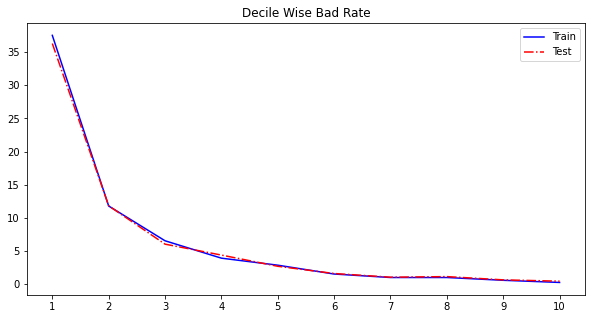

In [28]:
fig, axs = plt.subplots(figsize=(10, 5))
#Plotting Bad Rate
train_ks_table.Bad_Rate.plot(kind = 'line',color = 'blue',xticks=train_ks_table.index,label = 'Train',title = 'Decile Wise Bad Rate')
test_ks_table.Bad_Rate.plot(kind = 'line',color = 'red',linestyle='-.',xticks=train_ks_table.index,label = 'Test')
axs.legend(loc='upper right', frameon=True)